In [1]:
import pandas
import re
data = [line.strip() for line in open("C:\\Users\\Abhilasha\\Desktop\\train_set.txt", "r").readlines()]
data = [{"ALineNumber": line.split('~')[0], "Type": ((((line.split('~')[1]).split("INFO")[0]).split("log.")[0]).split("gs.")[1]).split(".")[0], "Time": (((line.split('~')[1]).split("INFO")[0]).split("log.")[1]),"Description": (re.sub('[^a-zA-Z]', ' ', re.sub(r'\[[^)]*\]', '', line.split("INFO")[1]))).lower()} for line in data]
data = pandas.DataFrame(data)
data.head()

,ALineNumber,Description,Time,Type
0,L0,gs resource resource tracker active base fil...,"60.Sep 09, 2019_10:45 17162",api
1,L1,gs resource manager instance destroyed succe...,14.2019-09-02_07:57 AM 60858,api
2,L2,gs api openstack compute wsgi vm resumed li...,65.11-09-2019_04:57 AM 72310,api
3,L3,gs openapi server get latest meta data blo...,82.07-09-2019_05:17 PM 5534,compute
4,L4,gs openstack server removing base or swap fi...,15.2019-09-14_16:27 39946,api


In [2]:
new_data=data.drop(columns=["Time", "Type"])
new_data

,ALineNumber,Description
0,L0,gs resource resource tracker active base fil...
1,L1,gs resource manager instance destroyed succe...
2,L2,gs api openstack compute wsgi vm resumed li...
3,L3,gs openapi server get latest meta data blo...
4,L4,gs openstack server removing base or swap fi...
5,L5,gs api openstack compute wsgi vm paused lif...
6,L6,gs compute manager post v fpzkcurqo xst i...
7,L7,gs openapi server get latest meta data blo...
8,L8,gs openstack server instance destroyed succe...
9,L9,gs compute resource tracker get latest met...


In [3]:
text = new_data['Description'].str.cat(sep=' ')
word_list = text.lower().split(None)
word_freq = {}
for word in word_list:
    word_freq[word] = word_freq.get(word, 0) + 1
stop_words=[]
keys = sorted(word_freq.keys())
for word in keys:
    print ("%-10s %d" % (word, word_freq[word]))
    if word_freq[word]<20:
        stop_words.append(word)

a          19
abg        2
active     20
ad         2
aez        1
afz        1
aiv        1
aj         1
ajgn       1
al         1
alhwbmq    1
allocated  66
ame        1
ami        46
amlkt      1
any        81
aofjpzrsmycn 1
aomju      1
api        205
apj        1
aq         1
aqge       1
aqk        2
aque       4
arqu       1
arxjfu     2
as         1
avtbogk    1
awg        1
ayc        1
az         6
azi        2
b          25
base       302
bc         1
bdsu       3
be         3
bg         3
bi         4
bjn        3
bk         2
bkrt       1
block      75
blvs       2
bm         1
bmp        1
bo         1
bord       1
bql        5
bs         2
bt         4
buc        1
build      17
bus        1
bvathc     2
bvj        1
bw         1
bzgwncosah 1
bztu       1
c          8
cb         6
ce         1
cf         1
cgksh      1
cgw        1
ch         1
chpd       1
cj         7
cjd        4
claims     82
clspd      1
cm         1
cmhkf      3
cn         6
cnklvu     4
compute   

In [4]:
print(stop_words)

['a', 'abg', 'ad', 'aez', 'afz', 'aiv', 'aj', 'ajgn', 'al', 'alhwbmq', 'ame', 'amlkt', 'aofjpzrsmycn', 'aomju', 'apj', 'aq', 'aqge', 'aqk', 'aque', 'arqu', 'arxjfu', 'as', 'avtbogk', 'awg', 'ayc', 'az', 'azi', 'bc', 'bdsu', 'be', 'bg', 'bi', 'bjn', 'bk', 'bkrt', 'blvs', 'bm', 'bmp', 'bo', 'bord', 'bql', 'bs', 'bt', 'buc', 'build', 'bus', 'bvathc', 'bvj', 'bw', 'bzgwncosah', 'bztu', 'c', 'cb', 'ce', 'cf', 'cgksh', 'cgw', 'ch', 'chpd', 'cj', 'cjd', 'clspd', 'cm', 'cmhkf', 'cn', 'cnklvu', 'con', 'cqjwp', 'csrwtah', 'ct', 'ctv', 'cujav', 'cw', 'cxekmg', 'cz', 'czg', 'd', 'danv', 'db', 'dbeuj', 'dcnab', 'destroy', 'df', 'dfynt', 'dj', 'djhc', 'dm', 'do', 'doct', 'dr', 'dsm', 'du', 'dua', 'dulao', 'dw', 'dwqbe', 'dx', 'dxu', 'e', 'eam', 'eaox', 'easb', 'ef', 'eg', 'ej', 'ejk', 'ek', 'en', 'enwlc', 'epdv', 'eq', 'eqb', 'er', 'eu', 'eva', 'evi', 'ew', 'ewzi', 'exg', 'expd', 'eyq', 'ezvs', 'f', 'fa', 'fami', 'fatemx', 'faus', 'fbq', 'fcpz', 'fcs', 'fcvp', 'fd', 'fezlkrqmy', 'fhnmt', 'fin', 'fns

In [5]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [6]:
corpus = []
for i in range(0, 1050):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['Description'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [7]:
corpus[9]

'g compute resource tracker get latest meta data block device mapping root http status len time'

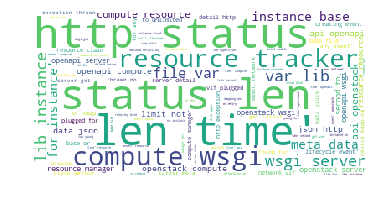

In [9]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [10]:
new_data["keywords"]=corpus
new_data

,ALineNumber,Description,keywords
0,L0,gs resource resource tracker active base fil...,g resource resource tracker active base file v...
1,L1,gs resource manager instance destroyed succe...,g resource manager instance destroyed successf...
2,L2,gs api openstack compute wsgi vm resumed li...,g api openstack compute wsgi vm resumed lifecy...
3,L3,gs openapi server get latest meta data blo...,g openapi server get latest meta data block de...
4,L4,gs openstack server removing base or swap fi...,g openstack server removing base or swap file ...
5,L5,gs api openstack compute wsgi vm paused lif...,g api openstack compute wsgi vm paused lifecyc...
6,L6,gs compute manager post v fpzkcurqo xst i...,g compute manager post v i server detail http ...
7,L7,gs openapi server get latest meta data blo...,g openapi server get latest meta data block de...
8,L8,gs openstack server instance destroyed succe...,g openstack server instance destroyed successf...
9,L9,gs compute resource tracker get latest met...,g compute resource tracker get latest meta dat...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = new_data["keywords"]

vectorizer = TfidfVectorizer(stop_words)
X = vectorizer.fit_transform(documents)

#true_k = 10
#model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
#model.fit(X)

Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

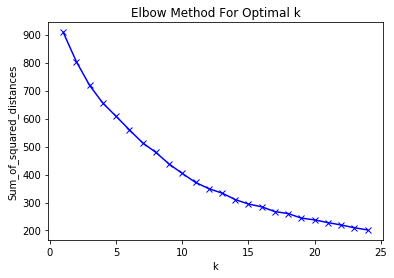

In [12]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

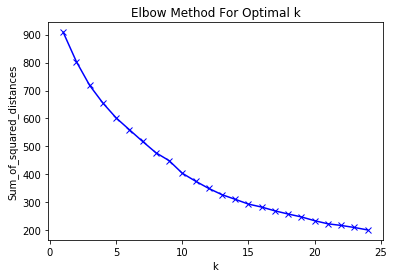

,ALineNumber,Description,Time,Type,word_count,keywords
0,L0,resource resource tracker req vleiy st b k h ...,"60.Sep 09, 2019_10:45 17162",api,19,resource resource tracker vleiy st b k h bjn r...
1,L1,resource manager req vz nx rj zcy lem a hg m ...,14.2019-09-02_07:57 AM 60858,api,24,resource manager vz nx rj zcy lem hg j zsi ins...
2,L2,api openstack compute wsgi req seht hxfm znf ...,65.11-09-2019_04:57 AM 72310,api,27,api openstack compute wsgi seht hxfm znf p f z...
3,L3,openapi server req xms j g zcrh kd eu GET lat...,82.07-09-2019_05:17 PM 5534,compute,23,openapi server xms j g zcrh kd eu get latest m...
4,L4,openstack server req ioxmw nub yrq Removing b...,15.2019-09-14_16:27 39946,api,15,openstack server ioxmw nub yrq removing base s...
5,L5,api openstack compute wsgi req l i v u fq ydj...,48.2019-09-14_04:23 PM 1844,api,26,api openstack compute wsgi l u fq ydjr instanc...
6,L6,compute manager req aeb fysr n w u gyb k xp z...,"18_Sep 04, 2019_01:16:00 7874",api,30,compute manager aeb fysr w u gyb k xp z post f...
7,L7,openapi server req u ntaj h tnxuz GET latest ...,87.06-09-2019_01:10 PM 71413,compute,21,openapi server u ntaj h tnxuz get latest meta ...
8,L8,openstack server req pz ansf b khtw za m inst...,79.2019-09-13_10:30 AM 87076,api,21,openstack server pz ansf b khtw za instance bq...
9,L9,compute resource tracker req dwqbe bc vla s j...,85.15-09-2019_11:29 PM 86946,compute,23,compute resource tracker dwqbe bc vla jfinu ge...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = new_data["keywords"]

vectorizer = TfidfVectorizer(stop_words)
X = vectorizer.fit_transform(documents)

true_k = 20
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 vif
 plugged
 creating
 network
 for
 event
 instance
 wsgi
 resource
 compute
Cluster 1:
 detail
 post
 status
 len
 time
 server
 http
 resource
 compute
 tracker
Cluster 2:
 base
 young
 remove
 too
 or
 swap
 var
 lib
 file
 to
Cluster 3:
 limit
 not
 unlimited
 defaulting
 to
 defined
 specified
 total
 default
 vcpu
Cluster 4:
 no
 any
 found
 thrown
 exception
 for
 event
 http
 entry
 resource
Cluster 5:
 vgpus
 total
 usable
 allocated
 resource
 compute
 server
 manager
 openapi
 tracker
Cluster 6:
 json
 data
 get
 status
 len
 time
 http
 user
 vendor
 meta
Cluster 7:
 server
 detail
 delete
 status
 time
 len
 http
 openapi
 openstack
 wsgi
Cluster 8:
 base
 lib
 var
 file
 instance
 removing
 or
 swap
 removable
 unknown
Cluster 9:
 lifecycle
 vm
 event
 paused
 resumed
 started
 wsgi
 compute
 openapi
 openstack
Cluster 10:
 the
 hypervisor
 took
 on
 second
 spawn
 to
 instance
 compute
 wsgi
Cluster 11:
 take
 the
 second
 to
 instanc

In [15]:
#testing 
import pandas
import re
data = [line.strip() for line in open("C:\\Users\\Abhilasha\\Desktop\\public_test_set.txt", "r").readlines()]
data = [{"ALineNumber": line.split('~')[0], "Type": ((((line.split('~')[1]).split("INFO")[0]).split("log.")[0]).split("gs.")[1]).split(".")[0], "Time": (((line.split('~')[1]).split("INFO")[0]).split("log.")[1]),"Description": (re.sub('[^a-zA-Z]', ' ', re.sub(r'\[[^)]*\]', '', line.split("INFO")[1]))).lower()} for line in data]
data = pandas.DataFrame(data)
data.head()

,ALineNumber,Description,Time,Type
0,L0,gs openapi server vcpu limit not specified ...,"69_Sep 14, 2019_13:20:00 58233",api
1,L1,gs openstack server took seconds to spa...,56.10-09-2019_04:18 PM 60109,compute
2,L2,gs compute manager http exception thrown no...,84_11-09-2019_09:30 80226,api
3,L3,gs openstack server get v vend...,"94.Sep 07, 2019_13:04 57889",compute
4,L4,gs api openapi compute wsgi total memory lim...,"40_Sep 11, 2019_23:18:00 61822",api


In [16]:
test_data=data.drop(columns=["Time", "Type"])
test_data

,ALineNumber,Description
0,L0,gs openapi server vcpu limit not specified ...
1,L1,gs openstack server took seconds to spa...
2,L2,gs compute manager http exception thrown no...
3,L3,gs openstack server get v vend...
4,L4,gs api openapi compute wsgi total memory lim...
5,L5,gs api openapi compute wsgi get v ...
6,L6,gs openstack wsgi server http exception thro...
7,L7,gs openapi wsgi server get v m...
8,L8,gs api openapi compute wsgi instance spawned...
9,L9,gs api openapi compute wsgi takes secon...


In [17]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [18]:
t_corpus = []
for i in range(0, 702):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['Description'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
   
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    t_corpus.append(text)

In [19]:
t_corpus[11]

'g resource resource tracker get latest meta data block device mapping ami http status len time'

In [20]:
test_data["keywords"]=t_corpus
test_data

,ALineNumber,Description,keywords
0,L0,gs openapi server vcpu limit not specified ...,g openapi server vcpu limit not specified defa...
1,L1,gs openstack server took seconds to spa...,g openstack server took second to spawn the in...
2,L2,gs compute manager http exception thrown no...,g compute manager http exception thrown no ins...
3,L3,gs openstack server get v vend...,g openstack server get v vendor data json http...
4,L4,gs api openapi compute wsgi total memory lim...,g api openapi compute wsgi total memory limit ...
5,L5,gs api openapi compute wsgi get v ...,g api openapi compute wsgi get v meta data jso...
6,L6,gs openstack wsgi server http exception thro...,g openstack wsgi server http exception thrown ...
7,L7,gs openapi wsgi server get v m...,g openapi wsgi server get v meta data json htt...
8,L8,gs api openapi compute wsgi instance spawned...,g api openapi compute wsgi instance spawned co...
9,L9,gs api openapi compute wsgi takes secon...,g api openapi compute wsgi take second to the ...


In [21]:
c=0
ans=[]
for i in test_data["keywords"]:
    st=[]
    st.append(i)
    Y = vectorizer.transform(st)
    prediction = model.predict(Y)
    ans.append("C"+str(int(prediction)))

    print("L"+str(c),"C"+str(int(prediction)))
    c+=1

L0 C3
L1 C10
L2 C4
L3 C6
L4 C3
L5 C6
L6 C4
L7 C6
L8 C18
L9 C11
L10 C7
L11 C15
L12 C11
L13 C19
L14 C2
L15 C2
L16 C1
L17 C10
L18 C15
L19 C4
L20 C9
L21 C12
L22 C2
L23 C7
L24 C8
L25 C8
L26 C15
L27 C8
L28 C8
L29 C7
L30 C4
L31 C9
L32 C16
L33 C6
L34 C14
L35 C4
L36 C0
L37 C9
L38 C3
L39 C10
L40 C4
L41 C16
L42 C7
L43 C10
L44 C7
L45 C16
L46 C2
L47 C3
L48 C7
L49 C4
L50 C6
L51 C16
L52 C3
L53 C6
L54 C7
L55 C7
L56 C8
L57 C1
L58 C6
L59 C4
L60 C14
L61 C9
L62 C7
L63 C9
L64 C8
L65 C1
L66 C15
L67 C12
L68 C4
L69 C9
L70 C6
L71 C11
L72 C8
L73 C0
L74 C15
L75 C7
L76 C8
L77 C9
L78 C0
L79 C6
L80 C3
L81 C9
L82 C8
L83 C8
L84 C10
L85 C6
L86 C0
L87 C4
L88 C4
L89 C5
L90 C9
L91 C15
L92 C15
L93 C10
L94 C0
L95 C8
L96 C6
L97 C12
L98 C0
L99 C10
L100 C10
L101 C2
L102 C0
L103 C0
L104 C17
L105 C15
L106 C3
L107 C13
L108 C7
L109 C15
L110 C19
L111 C10
L112 C3
L113 C9
L114 C7
L115 C8
L116 C18
L117 C9
L118 C11
L119 C9
L120 C6
L121 C7
L122 C16
L123 C14
L124 C16
L125 C9
L126 C7
L127 C6
L128 C17
L129 C17
L130 C0
L131 C12
L132 C4
L13

In [22]:
pandas.DataFrame({'LineNumber':test_data["ALineNumber"],'Class':ans}).to_csv('submit_final.csv')